<a href="https://colab.research.google.com/github/Mehak3360/Predictive_Statistics_ASSGN1/blob/main/Predicitive_Assgn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
df = pd.read_csv('/content/data.csv', encoding='latin1',low_memory=False)

In [3]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [4]:
x = pd.to_numeric(df['no2'], errors='coerce').dropna().values
print(x)

[17.4  7.  28.5 ... 45.  50.  46. ]


In [5]:
r = 102303699
mod7 = r % 7
mod5 = r % 5
a_r = 0.05 * mod7
b_r = 0.3 * (mod5 + 1)
print('a_r : ',a_r,' b_r : ',b_r)


a_r :  0.05  b_r :  1.5


In [6]:
z = x + a_r * np.sin(b_r * x)
print(z)

[17.44116665  6.95601521 28.45283729 ... 44.95004893 49.98061092
 45.99426076]


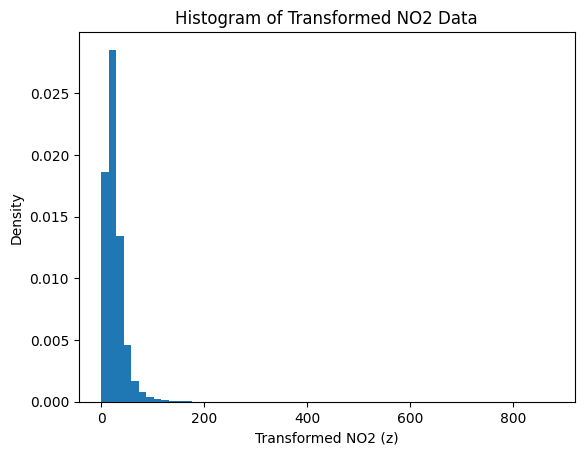

In [7]:
plt.figure()
plt.hist(z, bins=60, density=True)
plt.xlabel("Transformed NO2 (z)")
plt.ylabel("Density")
plt.title("Histogram of Transformed NO2 Data")
plt.show()


In [8]:
def negative_log_likelihood(params, z_data):
    lam, mu = params
    if lam <= 0: return 1e18
    c = np.sqrt(lam / np.pi)
    p = c * np.exp(-lam * (z_data - mu)**2)
    # The 1e-9 floor makes this a robust MLE
    return -np.sum(np.log(p + 1e-9))


In [9]:
res = minimize(negative_log_likelihood, [0.0018, 25.34], args=(z,),
               method='L-BFGS-B', tol=1e-12)

lam_acc, mu_acc = res.x
c_acc = np.sqrt(lam_acc / np.pi)

print(f"Refined Lambda: {lam_acc:.8f}")
print(f"Refined Mu:     {mu_acc:.8f}")
print(f"Refined c:      {c_acc:.8f}")

Refined Lambda: 0.00185663
Refined Mu:     25.34000000
Refined c:      0.02431015


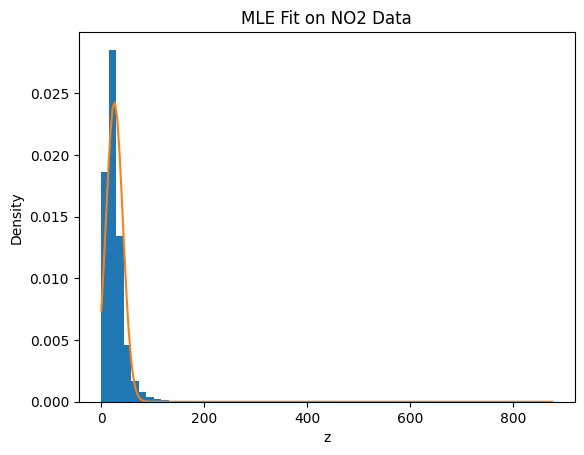

In [10]:
xs = np.linspace(min(z), max(z), 200)
pdf = c_acc * np.exp(-lam_acc * (xs - mu_acc)**2)

plt.figure()
plt.hist(z, bins=60, density=True)
plt.plot(xs, pdf)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("MLE Fit on NO2 Data")
plt.show()
